In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df=pd.read_csv('healthcareStrock.csv')

In [52]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
df['gender'].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [54]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [55]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [56]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [57]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [58]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [59]:
df.shape

(5110, 12)

In [60]:
rf=df.dropna()

In [61]:
rf.shape

(4909, 12)

In [62]:
rf.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [63]:
import seaborn as sns

<AxesSubplot:xlabel='age'>

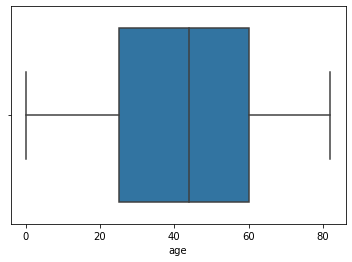

In [64]:
sns.boxplot(x='age',data=rf)

In [65]:
changes={'gender':{'Male':0,'Female':1},
        'ever_married':{'Yes':1,'No':0},
        'work_type':{'Private':1,'Self-employed':2,'children':3,'Govt_job':4,'Never_worked':5},
        'Residence_type':{'Urban':1,'Rural':2},
        'smoking_status':{'never smoked':1,'Unknown':2,'formerly smoked':3,'smokes':4}}

In [66]:
rf=rf.replace(changes)

In [67]:
rf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,1,1,228.69,36.6,3,1
2,31112,0,80.0,0,1,1,1,2,105.92,32.5,1,1
3,60182,1,49.0,0,0,1,1,1,171.23,34.4,4,1
4,1665,1,79.0,1,0,1,2,2,174.12,24.0,1,1
5,56669,0,81.0,0,0,1,1,1,186.21,29.0,3,1


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree

In [69]:
X=rf[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]

In [70]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,1,1,228.69,36.6,3
2,0,80.0,0,1,1,1,2,105.92,32.5,1
3,1,49.0,0,0,1,1,1,171.23,34.4,4
4,1,79.0,1,0,1,2,2,174.12,24.0,1
5,0,81.0,0,0,1,1,1,186.21,29.0,3
...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,0,3,2,103.08,18.6,2
5106,1,81.0,0,0,1,2,1,125.20,40.0,1
5107,1,35.0,0,0,1,2,2,82.99,30.6,1
5108,0,51.0,0,0,1,1,2,166.29,25.6,3


In [71]:
Y=rf[['stroke']]

In [72]:
Y

,stroke
0,1
2,1
3,1
4,1
5,1
...,...
5104,0
5106,0
5107,0
5108,0


In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)

In [74]:
y_test

,stroke
480,0
4892,0
977,0
4375,0
2898,0
...,...
2929,0
4075,0
4479,0
1445,0


In [75]:
dtree=DecisionTreeClassifier()

In [76]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
predictionDT=dtree.predict(x_test)

In [78]:
print(confusion_matrix(y_test,predictionDT))

[[1796   88]
 [  75    5]]


In [79]:
print(classification_report(y_test,predictionDT))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1884
           1       0.05      0.06      0.06        80

    accuracy                           0.92      1964
   macro avg       0.51      0.51      0.51      1964
weighted avg       0.92      0.92      0.92      1964



In [80]:
accuracy_score(y_test,predictionDT)*100

91.70061099796334

In [81]:
from sklearn.ensemble import RandomForestClassifier  
classifier1= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier1.fit(x_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [82]:
predictionRF=classifier.predict(x_test)

In [83]:
accuracy_score(y_test,predictionRF)*100

95.9775967413442

In [84]:
from sklearn.neighbors import KNeighborsClassifier  
classifier2= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier2.fit(x_train, y_train.values.ravel())  

KNeighborsClassifier()

In [85]:
predictionKNN=classifier.predict(x_test)

In [86]:
accuracy_score(y_test,predictionKNN)*100

95.9775967413442